In [1]:
import torch

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [8]:
import pandas as pd

In [7]:
!dir

 Volume in drive D is Code
 Volume Serial Number is 4E98-57D2

 Directory of d:\DeepLearningCourse\LogisticRegression\LogisticRegression

12/03/2022  03:55 PM    <DIR>          .
12/03/2022  03:55 PM    <DIR>          ..
12/03/2022  03:54 PM             1,928 .gitignore
12/03/2022  04:11 PM             1,153 LogisticRegression.ipynb
12/03/2022  03:54 PM                31 README.md
               3 File(s)          3,112 bytes
               2 Dir(s)  195,490,168,832 bytes free


In [9]:
data = pd.read_csv("dataset.csv")

In [10]:
data

,Lương,Thời gian làm việc,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [ ]:
data['Cho vay'] #DataFrame
#data['Lương']
#data['Thời gian làm việc']

In [17]:
data_tensor = torch.FloatTensor(data.values)    #Tensor có kích thước 20 hàng và 3 cột.
print(data_tensor.size())

torch.Size([20, 3])


In [18]:
data_tensor

tensor([[10.0000,  1.0000,  1.0000],
        [ 5.0000,  2.0000,  1.0000],
        [ 6.0000,  1.8000,  1.0000],
        [ 7.0000,  1.0000,  1.0000],
        [ 8.0000,  2.0000,  1.0000],
        [ 9.0000,  0.5000,  1.0000],
        [ 4.0000,  3.0000,  1.0000],
        [ 5.0000,  2.5000,  1.0000],
        [ 8.0000,  1.0000,  1.0000],
        [ 4.0000,  2.5000,  1.0000],
        [ 8.0000,  0.1000,  0.0000],
        [ 7.0000,  0.1500,  0.0000],
        [ 4.0000,  1.0000,  0.0000],
        [ 5.0000,  0.8000,  0.0000],
        [ 7.0000,  0.3000,  0.0000],
        [ 4.0000,  1.0000,  0.0000],
        [ 5.0000,  0.5000,  0.0000],
        [ 6.0000,  0.3000,  0.0000],
        [ 7.0000,  0.2000,  0.0000],
        [ 8.0000,  0.1500,  0.0000]])

In [33]:
x = data_tensor[:,:2]
x

tensor([[10.0000,  1.0000],
        [ 5.0000,  2.0000],
        [ 6.0000,  1.8000],
        [ 7.0000,  1.0000],
        [ 8.0000,  2.0000],
        [ 9.0000,  0.5000],
        [ 4.0000,  3.0000],
        [ 5.0000,  2.5000],
        [ 8.0000,  1.0000],
        [ 4.0000,  2.5000],
        [ 8.0000,  0.1000],
        [ 7.0000,  0.1500],
        [ 4.0000,  1.0000],
        [ 5.0000,  0.8000],
        [ 7.0000,  0.3000],
        [ 4.0000,  1.0000],
        [ 5.0000,  0.5000],
        [ 6.0000,  0.3000],
        [ 7.0000,  0.2000],
        [ 8.0000,  0.1500]])

In [34]:
ones = torch.ones(x.size(0), 1)

In [35]:
ones

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [40]:
y = data_tensor[:,2].reshape(-1, 1)
y

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [41]:
w = torch.randn(3, 1)   # w0, w1, w2
x = data_tensor[:, :2]
ones = torch.ones(x.size(0), 1)
x = torch.cat([ones, x], dim=1)
y = data_tensor[:, 2].reshape(-1, 1)

In [42]:
vay = x[data_tensor[:, 2] > 0, :]
vay

tensor([[ 1.0000, 10.0000,  1.0000],
        [ 1.0000,  5.0000,  2.0000],
        [ 1.0000,  6.0000,  1.8000],
        [ 1.0000,  7.0000,  1.0000],
        [ 1.0000,  8.0000,  2.0000],
        [ 1.0000,  9.0000,  0.5000],
        [ 1.0000,  4.0000,  3.0000],
        [ 1.0000,  5.0000,  2.5000],
        [ 1.0000,  8.0000,  1.0000],
        [ 1.0000,  4.0000,  2.5000]])

In [43]:
khong_vay = x[data_tensor[:,2] < 1, :]
khong_vay

tensor([[1.0000, 8.0000, 0.1000],
        [1.0000, 7.0000, 0.1500],
        [1.0000, 4.0000, 1.0000],
        [1.0000, 5.0000, 0.8000],
        [1.0000, 7.0000, 0.3000],
        [1.0000, 4.0000, 1.0000],
        [1.0000, 5.0000, 0.5000],
        [1.0000, 6.0000, 0.3000],
        [1.0000, 7.0000, 0.2000],
        [1.0000, 8.0000, 0.1500]])

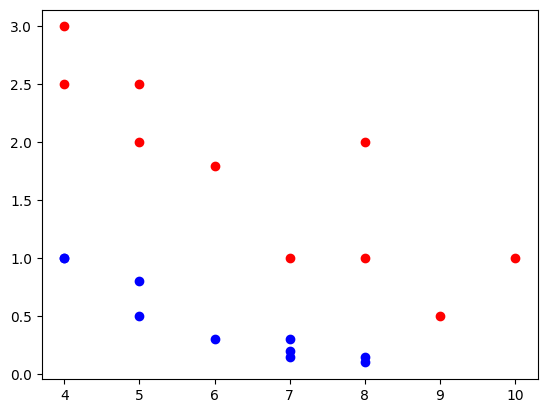

In [45]:
plt.scatter(x=vay[:,1], y=vay[:,2], c ='r')
plt.scatter(x=khong_vay[:,1], y=khong_vay[:,2], c='b')

In [56]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

def logistic_regression(x, w):
    return sigmoid(x@w)

def bce_loss(x, y, w):
    eps = 1e-10     #trick tránh tràn số.
    y_hat = logistic_regression(x, w) + eps #tránh = 0
    y_hat[y_hat >= 1] = 1-eps #tránh = 1
    bce = -(y*torch.log(y_hat) + (1-y)*torch.log(1-y_hat)).mean()   #mean() tính giá trị tb trên tất cả data
    return bce

In [145]:
def gradf(x, y, w):
    # dL / dw
    #print(x.size(), y.size(), w.size())
    y_hat = logistic_regression(x, w)
    grad = x.T @ (y_hat-y) / x.size(0)
    #print(grad.size())
    return grad

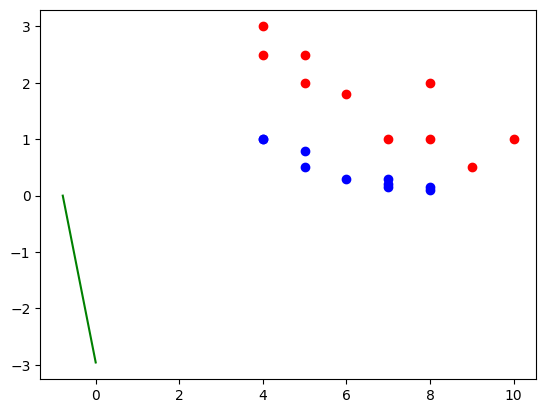

In [215]:
w = torch.randn(3, 1)
x01 = 0
x02 = -(w[0]/w[2])
x12 = 0
x11 = -(w[0]/w[1])

plt.plot([x01, x11], [x02, x12], c = 'g')
plt.scatter(x=vay[:,1], y=vay[:,2], c ='r')
plt.scatter(x=khong_vay[:,1], y=khong_vay[:,2], c='b')



In [207]:
def train(x, y, w, lr, iter):
    losses = []
    for i in range(iter):
        grad = gradf(x, y, w)
        w = w - lr*grad
        loss = bce_loss(x, y, w)
        losses.append(loss.item())
    return w, losses

tensor([[-11.6640],
        [  1.1111],
        [  5.1986]])


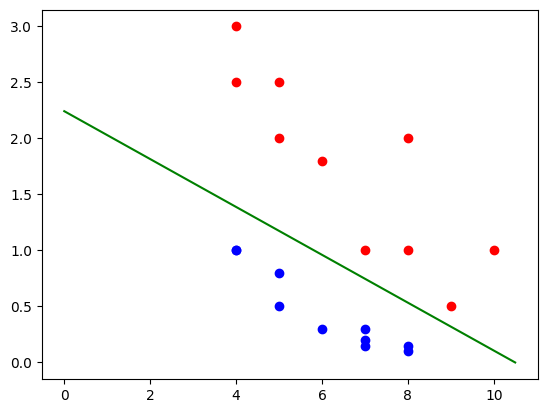

In [216]:
w, losses = train(x, y, w, lr = 0.05, iter = 10000)
print(w)
x01 = 0
x02 = -(w[0]/w[2])
x12 = 0
x11 = -(w[0]/w[1])
plt.plot([x01, x11], [x02, x12], c = 'g')
plt.scatter(x=vay[:,1], y=vay[:,2], c ='r')
plt.scatter(x=khong_vay[:,1], y=khong_vay[:,2], c='b')


#Single Neuron = Perceptron

In [217]:
losses

[2.580526113510132,
 2.0147640705108643,
 1.4914840459823608,
 1.0651074647903442,
 0.8051623106002808,
 0.7057620882987976,
 0.6787099242210388,
 0.6695530414581299,
 0.6640032529830933,
 0.6592354774475098,
 0.6547115445137024,
 0.6503263711929321,
 0.6460574865341187,
 0.6418979167938232,
 0.6378440260887146,
 0.6338925957679749,
 0.63004070520401,
 0.6262855529785156,
 0.6226242780685425,
 0.6190541982650757,
 0.6155727505683899,
 0.6121771931648254,
 0.6088650226593018,
 0.6056338548660278,
 0.6024812459945679,
 0.5994049310684204,
 0.5964025259017944,
 0.593471884727478,
 0.5906110405921936,
 0.5878176689147949,
 0.5850898623466492,
 0.5824257135391235,
 0.57982337474823,
 0.5772808194160461,
 0.5747964382171631,
 0.5723683834075928,
 0.5699952244758606,
 0.567674994468689,
 0.565406322479248,
 0.5631877183914185,
 0.5610176920890808,
 0.558894693851471,
 0.5568175315856934,
 0.5547847747802734,
 0.5527951121330261,
 0.5508474111557007,
 0.5489403009414673,
 0.5470727682113647,
 

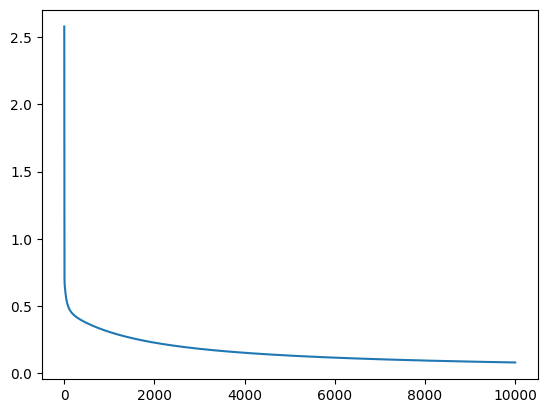

In [218]:
plt.plot(losses)
#Nếu lr quá lớn